In [16]:
from torch import tensor
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import numpy as np
import torch

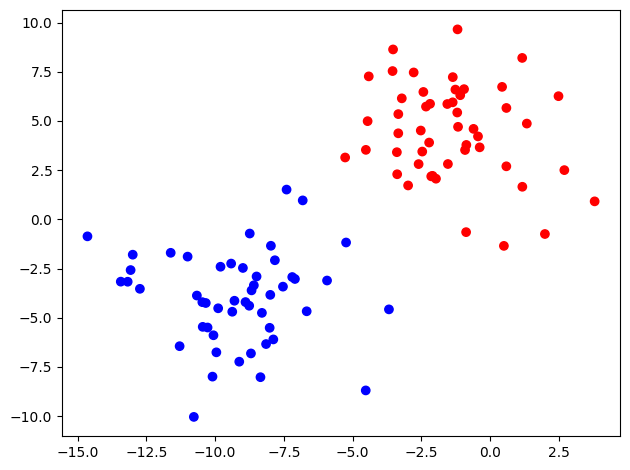

In [48]:
x, y = make_blobs (n_features=2, centers=2, n_samples=100, cluster_std=2.5, random_state=1)

colormap=np.array(['r','b'])

plt.scatter(x[:,0],x[:,1],c=colormap[y])

plt.tight_layout()

In [18]:
x=torch.from_numpy(x.astype(np.float32))
y=torch.from_numpy(y.astype(np.float32))

x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=1)

In [19]:
y_train=y_train.reshape([-1,1])
y_test=y_test.reshape([-1,1])

In [20]:
n_samples,n_features = x.shape

In [21]:
class LogRegressionModel(nn.Module):
     
     def __init__(self, n_input_features) -> None:
          
          super(LogRegressionModel, self).__init__()

          self.linear = nn.Linear(n_input_features, 1)

     def forward(self, x):
          
          y_predicted = torch.sigmoid(self.linear(x))

          return y_predicted

In [22]:
model = LogRegressionModel(n_input_features=n_features)

list(model.parameters())

[Parameter containing:
 tensor([[0.4128, 0.5612]], requires_grad=True),
 Parameter containing:
 tensor([-0.1740], requires_grad=True)]

In [51]:
# loss and optimiser

learning_rate = 0.01
loss_func = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100

for epoch in range(num_epochs):

    y_pred = model(x_train)

    loss = loss_func(y_pred, y_train)

    loss.backward()

    optimiser.step()

    optimiser.zero_grad()

    if (epoch +1) % 10==0:

        print(loss.item())

with torch.no_grad():

    y_pred = model(x_test)

    y_pred_class = y_pred.round()

    accuracy = y_pred_class.eq(y_test).sum()/float(y_test.shape[0])

    print('Accuracy score: ',accuracy.item())

0.11320842802524567
0.10810332000255585
0.10377912223339081
0.10006280243396759
0.0968293622136116
0.09398631006479263
0.09146354347467422
0.08920701593160629
0.08717435598373413
0.08533181250095367
Accuracy score:  1.0
